# You will be working with basic Word2Vec Problems.

# Step 1: Load the Wikipedia GLoVE Word2Vec.


In [1]:
import os, sys
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from gensim.models import KeyedVectors, Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm

In [25]:
nltk.download('stopwords')

# Step 1: Load the Wikipedia GLoVE Word2Vec

### What we're doing:
In this step, we're loading the pre-trained GloVe (Global Vectors for Word Representation) model that has been trained on a large corpus (Wikipedia data and Gigaword) into our Python environment.

### Using:
We're using the gensim library, specifically the KeyedVectors class, to load the GloVe model. The GloVe 
model file we're using is glove.6B.100d.txt, which represents 100-dimensional word vectors trained on the combined dataset.

### Why:
Loading a pre-trained model like GloVe allows us to leverage a rich set of word embeddings that capture the semantic relationships between words based on their co-occurrence in a large corpus. This is foundational for performing natural language processing tasks like computing word similarities, as it provides us with a meaningful representation of words in a high-dimensional space.

# Loading the GloVe Model:


In [3]:
# ! rm -f glove.6B*
# ! wget  https://nlp.stanford.edu/data/glove.6B.zip
# ! unzip glove.6B.zip

In [4]:
base_path = '/Users/hims/Downloads/glove.6B'
# base_path = './'

In [5]:
def load_model(model_path):
    return KeyedVectors.load_word2vec_format(model_path, 
                                             binary=False, 
                                             no_header=True)

# Step 2: Show how similar are these words:

    * Man and Woman, 
    * Chair and Throne
    * water and baby

In [6]:
word_pairs = [
    ('Man', 'Woman'),
    ('Chair', 'Throne'),
    ('water', 'baby')
]

def evaluate(model, model_name):
    print(f"\nUsing Model = {model_name}")
    for word1, word2 in word_pairs:
        similarity = model.similarity(word1.lower(), word2.lower())
        print(f"\tSimilarity between '{word1}' and '{word2}': {similarity:.4f}")


The scores are same with all 4 models.

* Similarity between 'man' and 'woman': 0.8323 - A similarity score of 0.8323 is very high, indicating that  "man" and "woman" are closely related in the vector space and they often used in same context and sometime together.


* Similarity between 'chair' and 'throne': 0.3001 - The similarity score of 0.3001 for "chair" and "throne" is much lower than that of "man" and "woman," suggesting a more distant relationship because often throne refer with kings and queens but chair is very common in real world.


* Similarity between 'water' and 'baby': 0.4032 - The similarity score of 0.4032 for "water" and "baby" , they aretwo differnt entity and even metaphorically they are distant. The medium  score  suggests that there will be enough cocurrence in the training data.

# Loading the 100-Dimensional GloVe Model:

In [7]:
glove_input_file_100d = f'{base_path}/glove.6B.100d.txt'  
model_100d = load_model(glove_input_file_100d)
evaluate(model_100d, "model_100d")


Using Model = model_100d
	Similarity between 'Man' and 'Woman': 0.8323
	Similarity between 'Chair' and 'Throne': 0.3001
	Similarity between 'water' and 'baby': 0.4032


# Loading the 200-Dimensional GloVe Model:


In [8]:
glove_input_file_200d = f'{base_path}/glove.6B.200d.txt'  
# model_200d = KeyedVectors.load_word2vec_format(glove_input_file_200d, binary=False, no_header=True)
model_200d = load_model(glove_input_file_200d)
evaluate(model_200d, "model_200d")


Using Model = model_200d
	Similarity between 'Man' and 'Woman': 0.7520
	Similarity between 'Chair' and 'Throne': 0.2469
	Similarity between 'water' and 'baby': 0.3530


# Loading the 300-Dimensional GloVe Model:


In [9]:
glove_input_file_300d = f'{base_path}/glove.6B.300d.txt'  
# model_300d = KeyedVectors.load_word2vec_format(glove_input_file_300d, binary=False, no_header=True)
model_300d = load_model(glove_input_file_300d)
evaluate(model_300d, "model_300d")


Using Model = model_300d
	Similarity between 'Man' and 'Woman': 0.6999
	Similarity between 'Chair' and 'Throne': 0.2755
	Similarity between 'water' and 'baby': 0.2417


We opt to use the 300-dimensional model despite the lower similarity scores compared to the 100-dimensional model because the 300d model is capable of capturing a more detailed and nuanced understanding of word meanings and relationships. This richness and depth in representation can be crucial for tasks requiring a finer grasp of linguistic subtleties.

# Step 3: Using these provide analogies for the following:

    _____ is to King as Woman is to Man.
    _____ is to Princess as Man is to Woman.
    _____ is to a woman as a child is to an adult.

In [10]:
sentences = [ "_____ is to King as Woman is to Man.",
              "_____ is to Princess as Man is to Woman.",
              "_____ is to a woman as a child is to an adult.",
            ]

def to_camel_case(word):
    return word[0].upper() + word[1:]
    
for sentence in sentences:
    print(f"\nProcessing { sentence = } \n")
    sentence = sentence.strip()

    first = sentence.split("is to")[1].strip().split(" ")[-1].strip().lower()
    second = sentence.split("as")[0].strip().split(" ")[-1].strip().lower()

    positive = [first, second]
    negative = [sentence.strip().split(" ")[-1].replace(".", "").lower().strip()]
    
    result = model_300d.most_similar(positive=positive, negative=negative, topn=1)
    
    print(f"\t{positive = }, {negative = }, {result = }")
    
    sentence = sentence.replace("_____", to_camel_case(result[0][0]))
    print(f"\n\tFinal Sentence : '{sentence}' \n\n")
     


Processing  sentence = '_____ is to King as Woman is to Man.' 

	positive = ['woman', 'king'], negative = ['man'], result = [('queen', 0.6713277101516724)]

	Final Sentence : 'Queen is to King as Woman is to Man.' 



Processing  sentence = '_____ is to Princess as Man is to Woman.' 

	positive = ['man', 'princess'], negative = ['woman'], result = [('prince', 0.653658926486969)]

	Final Sentence : 'Prince is to Princess as Man is to Woman.' 



Processing  sentence = '_____ is to a woman as a child is to an adult.' 

	positive = ['child', 'woman'], negative = ['adult'], result = [('mother', 0.6800265908241272)]

	Final Sentence : 'Mother is to a woman as a child is to an adult.' 




## Step 4: Apply Naive-Bayes Classifier on the Spam-Ham dataset shown in the demo.

In [11]:
! rm -rf spam.csv
! wget --quiet https://raw.githubusercontent.com/anjali-ojha/deep-learning/ass-7/spam.csv

In [12]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [13]:
def text_pre_processing(sms):
    
    # removing punctuations
    sms_wo_punct = [x for x in sms if x not in string.punctuation]
    sms_wo_punct = ''.join(sms_wo_punct)
    
    # keeping only english letters
    sms_wo_punct_only_words = [x for x in sms_wo_punct if x.isalpha() or x == " "]
    sms_wo_punct_only_words = ''.join(sms_wo_punct_only_words)
    
    # converting the data to lower case
    sms_wo_punct_only_words_lc = sms_wo_punct_only_words.lower()
    
    # removing stopwords
    sms_wo_punct_only_words_lc = sms_wo_punct_only_words_lc.split(" ")
    sms_wo_punct_only_words_lc_wo_sw = [x for x in sms_wo_punct_only_words_lc if x not in stopwords.words('english')]
    sms_wo_punct_only_words_lc_wo_sw = ' '.join(sms_wo_punct_only_words_lc_wo_sw)
    
    return sms_wo_punct_only_words_lc_wo_sw


# Applying preprocessing to each SMS
data['pre_processed_sms'] = data['v2'].apply(text_pre_processing)
data[['v1', 'v2', 'pre_processed_sms']].head()

,v1,v2,pre_processed_sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [14]:
def split_data_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X = data['pre_processed_sms']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f"Training Size = {X_train.shape[0]}, {y_train.shape[0]}")
print(f"Test Size     = {X_test.shape[0]}, {y_test.shape[0]}")

Training Size = 4179, 4179
Test Size     = 1393, 1393


In [15]:
"""
Step 4: Convert Text to Features using TF-IDF to convert the preprocessed text into a 
        matrix of TF-IDF features.

"""
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [16]:
"""
Step 5: Train the Naive Bayes Classifier using the TF-IDF features.
"""

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [17]:
"""
Predict on the test data. Getting both Probabilities and Prediction Labels.
"""
y_pred = nb_classifier.predict(X_test_tfidf)

In [18]:
def calculate_metrics_and_plot(y_test, y_pred):
    """
    Plotting the Confusion Matrix.
    """
    report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], output_dict=True)
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
                fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], 
                yticklabels=['Ham', 'Spam'])
    plt.title('Confusion Matrix for Naive Bayes Classifier')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98      1213
        Spam       1.00      0.71      0.83       180

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393



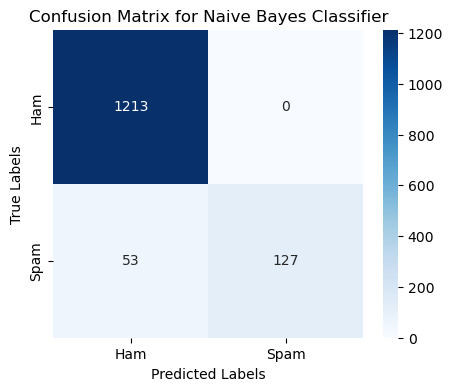

In [19]:
calculate_metrics_and_plot(y_test, y_pred)

### Other Appraoch -  to build features using Word2Vec

In [20]:
X = data['pre_processed_sms']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

print(f"Training Size = {X_train.shape[0]}, {y_train.shape[0]}")
print(f"Test Size     = {X_test.shape[0]}, {y_test.shape[0]}")

Training Size = 4457, 4457
Test Size     = 1115, 1115


In [21]:
wv_model = Word2Vec(sentences=X_train, vector_size=500, window=5, min_count=1, workers=4)

In [22]:
"""
Feature Generation using Words2Vec
"""

from sklearn.preprocessing import MinMaxScaler

def convert_word_to_vector(sms, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in sms:
        try:
            vec += wv_model.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec


X_train_vecs = scale(np.concatenate([convert_word_to_vector(z, 500) for z in X_train]))
X_test_vecs = scale(np.concatenate([convert_word_to_vector(z, 500) for z in X_test]))

# Perform MinMax scaling
scaler = MinMaxScaler()
X_train_vecs_scaled = scaler.fit_transform(X_train_vecs)
X_test_vecs_scaled = scaler.transform(X_test_vecs)

print(X_train.shape, X_test.shape)
print(X_train_vecs.shape, X_test_vecs.shape)
print(X_train_vecs_scaled.shape, X_test_vecs_scaled.shape)


print(f"Training Size = {X_train_vecs_scaled.shape[0]}, {y_train.shape}")
print(f"Test Size     = {X_test_vecs_scaled.shape[0]},  {y_test.shape}")

(4457,) (1115,)
(4457, 500) (1115, 500)
(4457, 500) (1115, 500)
Training Size = 4457, (4457,)
Test Size     = 1115,  (1115,)


In [23]:
nb_classifier = MultinomialNB(alpha=.5)
nb_classifier.fit(X_train_vecs_scaled, y_train)
y_pred = nb_classifier.predict(X_test_vecs_scaled)

              precision    recall  f1-score   support

         Ham       0.90      0.95      0.92       965
        Spam       0.48      0.31      0.38       150

    accuracy                           0.86      1115
   macro avg       0.69      0.63      0.65      1115
weighted avg       0.84      0.86      0.85      1115



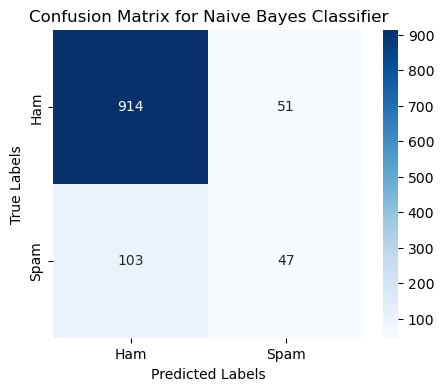

In [24]:
calculate_metrics_and_plot(y_test, y_pred)

## Observations -  As its clear from results that tfidf way of feature generation works best for SPAM detection.